In [4]:
from cmp import *
% matplotlib notebook
np.set_printoptions(threshold=np.nan)

Returning the following lattice and basis
[[1.  0.  0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]
[0. 0. 0.]
Limit type:
individual
[[1.  0.  0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]
[2 2 2]
[[2. 1. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]
(array([0., 0., 0.]), array([2., 1., 2.]), array([-2, -2, -2]), array([4, 4, 4]))


<IPython.core.display.Javascript object>


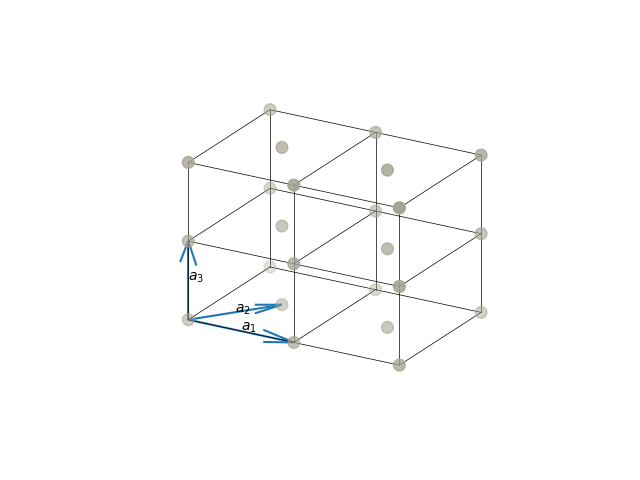

In [5]:
# Inputs
eq = np.isclose
# Lattice vectors (3 vectors of length 3)
a = 1
b = 2
a1 = np.array([1, 0, 0])
a2 = np.array([0, 1, 0])
a3 = np.array([0, 0, 1])
theta = 80*np.pi/180

# Array of basis vectors
basis = np.array([[0,0,0],[0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5]])
# Colors for each of the basis vectors
colors = ('xkcd:cement','b','b','b')
# Size multiplier for each of the atoms. Default is 1
sizes = (2,1,1,1)
verbose = True


# Gridline type:
# Soft: Lines along cartesian axes. Takes into account nonequal lattice spacing
# LatticeVectors: Lines along the latticevectors (only on lattice points)
GridType = "lattice"

# Limit type:
# individual: Sets the limits as max(nx*a1,ny*a2,nz*a3), so we include nx unitcells in the a1 direction, etc.
# sum: Sets the limits r_min = n_min*[a1 a2 a3] and likewise for n_max
LimType = "dynamic"
Maxs = [2,2,2]
Mins = [0,0,0]

LatticeType = "base centred cubic"
#LatticeCreator(a1,a2,a3,basis,colors,sizes,LimType,GridType,Mins,Maxs)
LatticeCreator(Lattice = LatticeType, verb=False)

In [3]:
def CreateLines(points, v1, v2, v3,
                r_min=np.array([0, 0, 0]),
                r_max=np.array([2, 2, 2])):
    """
    Creates lines along vectors and limits these to the given plot box
    """
    # Let's try and create some grid lines along the lattice vectors some
    # observations regarding grid lines: if we go along a lattice vector to a
    # point, then we need gridlines that are along the direction of the other
    # two lattice vectors A naïve approach would be to just plot 3 lines for
    # each atomic position (after limiting). This would create multiple copies
    # of some gridlines, but it's an easy solution. Let's see how long it takes
    # to compute!

    # Create the plotting parameter for the gridlines.
    # They use the equation r = r0+t * a, where:
    # r0 is a fixed point (atomic position)
    # a is a vector giving the direction of the gridline (lattice vector)
    # t is a scaling parameter, creating the points along the line.
    # We use halfinteger steps for t. That way we know that we'll properly hit
    # other atomic positions. If we used linspace this wouldn't be the case

    t = np.arange(-10, 10, 0.5)

    lines = []

    # Create all gridlines needed and append them to the lines-list
    numPoints = np.shape(points)[0]
    for rowID in range(numPoints):
        CurrentPoint = points[rowID, ]
        line1 = CurrentPoint + np.outer(t, v1)
        line2 = CurrentPoint + np.outer(t, v2)
        line3 = CurrentPoint + np.outer(t, v3)
        lines.append([line1, line2, line3])

    # run through each line and clip points outside limits
    pruned_lines = []
    for point in lines:
        for line in point:
            # Get the points outside the plot and delete them
            rows = Limiter(line, r_min, r_max)
            line = np.delete(line, rows, 0)

            # Because we're working with arrays we're passing copies, we need
            # to append the pruned lines to a new list. And let's only add
            # them if there are actually any points to plot
            line_length, _ = np.shape(line)
            if line_length > 0:
                pruned_lines.append(line)
    return pruned_lines